# Identifying Dominant Features for Sales Preprocessing

## Data Preprocessing

In [1]:
import pandas as pd

#read data in chunks of 1 million rows at a time
chunk = pd.read_csv('../archive/used_cars_data.csv', chunksize=1000000, low_memory=False)
df = pd.concat(chunk)

In [2]:
# Drop columns that are not used
df.drop(['combine_fuel_economy', 'is_certified', 'vehicle_damage_category', 'is_cpo', 'is_oemcpo'], axis=1, inplace=True)
df.drop(['listing_id', 'listing_color', 'listed_date', 'city', 'latitude', 'longitude', 'dealer_zip', 'franchise_dealer', 'franchise_make', 'seller_rating', 'sp_id', 'sp_name', 'wheel_system_display', 'trimId', 'trim_name'], axis=1, inplace=True)

In [3]:
import numpy as np

# Create a new boolean column 'has_picture' based on 'main_picture_url'
df['has_picture'] = pd.notna(df['main_picture_url'])
df.drop(['main_picture_url'], axis=1, inplace=True)

# Create a new boolean column 'has_description' based on 'description'
df['has_description'] = pd.notna(df['description'])
df.drop(['description'], axis=1, inplace=True)

df.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city_fuel_economy,daysonmarket,engine_cylinders,...,theft_title,torque,transmission,transmission_display,wheel_system,wheelbase,width,year,has_picture,has_description
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,NaN,522,I4,...,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,FWD,101.2 in,79.6 in,2019,True,True
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,NaN,207,I4,...,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,AWD,107.9 in,85.6 in,2020,True,True
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,17.0,1233,H4,...,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,AWD,104.3 in,78.9 in,2016,False,False
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,NaN,196,V6,...,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,AWD,115 in,87.4 in,2020,True,True
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,NaN,137,I4,...,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,AWD,107.9 in,85.6 in,2020,True,True


In [4]:
# Remove duplicates

# Sum of duplicate rows
duplicate_rows = df.duplicated().sum()

print(f"Duplicate rows count: {duplicate_rows}")

# Get the percentage of duplicate rows
percentage = duplicate_rows/df.shape[0]*100
print(f"The percentage of duplicate rows is {percentage}%")

# setting the duplicated vins
duplicate_vins = df.duplicated(keep=False)

# calling the duplicated vins in a dataframe
df.loc[duplicate_vins, :].sort_values(by=['vin']).head(7)

Duplicate rows count: 40
The percentage of duplicate rows is 0.0013333155557925895%


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city_fuel_economy,daysonmarket,engine_cylinders,...,theft_title,torque,transmission,transmission_display,wheel_system,wheelbase,width,year,has_picture,has_description
2000032,1C3CCCBG4FN686074,37.6 in,NaN,NaN,NaN,Sedan,NaN,19.0,530,V6,...,False,"262 lb-ft @ 4,250 RPM",A,Automatic,FWD,108.9 in,73.6 in,2015,True,True
2000052,1C3CCCBG4FN686074,37.6 in,NaN,NaN,NaN,Sedan,NaN,19.0,530,V6,...,False,"262 lb-ft @ 4,250 RPM",A,Automatic,FWD,108.9 in,73.6 in,2015,True,True
2000043,1C6RR7FT5ES405345,34.7 in,NaN,--,76.3 in,Pickup Truck,NaN,NaN,49,V8,...,False,"407 lb-ft @ 3,950 RPM",NaN,NaN,4WD,140.5 in,79.4 in,2014,True,True
2000023,1C6RR7FT5ES405345,34.7 in,NaN,--,76.3 in,Pickup Truck,NaN,NaN,49,V8,...,False,"407 lb-ft @ 3,950 RPM",NaN,NaN,4WD,140.5 in,79.4 in,2014,True,True
1000038,1FA6P8TH0J5179933,29 in,NaN,NaN,NaN,Coupe,NaN,21.0,7,I4,...,False,"350 lb-ft @ 3,000 RPM",A,Automatic,RWD,107.1 in,81.9 in,2018,True,True
1000018,1FA6P8TH0J5179933,29 in,NaN,NaN,NaN,Coupe,NaN,21.0,7,I4,...,False,"350 lb-ft @ 3,000 RPM",A,Automatic,RWD,107.1 in,81.9 in,2018,True,True
2000029,1FADP3F29FL349680,33.2 in,NaN,NaN,NaN,Sedan,NaN,27.0,118,I4 Flex Fuel Vehicle,...,False,"148 lb-ft @ 5,000 RPM",A,Automatic,FWD,104.3 in,71.8 in,2015,True,True


In [5]:
# Drop the dublicate vins
df = df.drop_duplicates().copy()

# checking for duplicate rows in the new dataframe
dup = df.duplicated().sum()

# Drop vin, because it is not used anymore
df.drop(['vin'], axis=1, inplace=True)

print(f"The number of duplicate rows are {dup}.")

The number of duplicate rows are 0.


In [6]:
# checking how many null values are in the dataframe that are over 0%
percentage = df.isna().sum()/df.shape[0]*100

pd.DataFrame(percentage[percentage > 0])

,0
back_legroom,5.308867
bed,99.347733
bed_height,85.696967
bed_length,85.696967
body_type,0.451400
cabin,97.882267
city_fuel_economy,16.375933
engine_cylinders,3.352667
engine_displacement,5.746100
engine_type,3.352667


We can see that bed, bed_height, bed_length and cabin categories contains an exceptionally large amount of null values. We can state that these categories can be dropped.

In [7]:
df.drop(['bed', 'bed_height', 'bed_length', 'cabin'], axis=1, inplace=True)
df.head()

,back_legroom,body_type,city_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,...,theft_title,torque,transmission,transmission_display,wheel_system,wheelbase,width,year,has_picture,has_description
0,35.1 in,SUV / Crossover,NaN,522,I4,1300.0,I4,Solar Yellow,NaN,NaN,...,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,FWD,101.2 in,79.6 in,2019,True,True
1,38.1 in,SUV / Crossover,NaN,207,I4,2000.0,I4,Narvik Black,NaN,NaN,...,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,AWD,107.9 in,85.6 in,2020,True,True
2,35.4 in,Sedan,17.0,1233,H4,2500.0,H4,None,False,False,...,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,AWD,104.3 in,78.9 in,2016,False,False
3,37.6 in,SUV / Crossover,NaN,196,V6,3000.0,V6,Eiger Gray,NaN,NaN,...,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,AWD,115 in,87.4 in,2020,True,True
4,38.1 in,SUV / Crossover,NaN,137,I4,2000.0,I4,Narvik Black,NaN,NaN,...,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,AWD,107.9 in,85.6 in,2020,True,True


## Categorial Exploration

Now that the dataframe has been cleaned up a bit, we can start to explore the categories in more detail.

Efforts are being made to convert each remaining category containing numerical information into a numerical one. The categories are examined whether null values should be deleted or filled with mean, median or mode values. Some categories are dropped if they contain the same information as other categories. Some categories are also combined.

### back_legroom

The amount of null values in the back_legroom column are 5.31%

Tasks:
- Change the back legroom category values to numeric.
- Change the '--' values to Nan.
- Change the data type to float.

We will fill the nan values with the following logic:

- If the car has 2 or three seats, 'back_legroom' = 0, because there are no back seats with legroom.
- Also set to 0 for all Pickup Truck type cars.
- Other values are filled with the median value of the whole category, on the assumption that the value is simply not reported for some reason.

In [8]:
# Amount of null values as a percentage
percentage = df['back_legroom'].isna().sum()/df.shape[0]*100
print(f"The amount of null values is {percentage.round(2)}%.")

# Unique values of the column
df['back_legroom'].unique()

The amount of null values is 5.31%.


array(['35.1 in', '38.1 in', '35.4 in', '37.6 in', '37.1 in', '33.8 in',
       '--', '35 in', '39.6 in', '35.7 in', '27.3 in', '38.4 in',
       '36.8 in', '38.6 in', '39.4 in', nan, '34.1 in', '39.5 in',
       '36.2 in', '39.9 in', '37 in', '37.2 in', '38.3 in', '27.1 in',
       '40.1 in', '34.6 in', '35.3 in', '37.4 in', '38 in', '39.7 in',
       '35.6 in', '42.6 in', '33.7 in', '39 in', '38.2 in', '33 in',
       '37.9 in', '29.9 in', '37.8 in', '36.1 in', '34.2 in', '37.3 in',
       '40.3 in', '35.8 in', '39.3 in', '38.7 in', '39.1 in', '43.6 in',
       '41.7 in', '36.3 in', '45.2 in', '30.6 in', '43.4 in', '36.6 in',
       '33.1 in', '35.5 in', '39.8 in', '35.2 in', '40.9 in', '38.5 in',
       '36.5 in', '35.9 in', '44.3 in', '34.3 in', '33.4 in', '32.2 in',
       '33.3 in', '34.8 in', '30.8 in', '31.4 in', '37.7 in', '31.7 in',
       '36.4 in', '32.6 in', '40.4 in', '34.7 in', '40 in', '41.9 in',
       '30.5 in', '30.3 in', '33.5 in', '33.9 in', '29.2 in', '38.8 in',
 

In [9]:
df['back_legroom'] = df['back_legroom'].str.split(' ').str[0]
df['back_legroom'] = pd.to_numeric(df['back_legroom'], downcast='float', errors='coerce')

df['back_legroom']

0          35.099998
1          38.099998
2          35.400002
3          37.599998
4          38.099998
             ...    
3000035    39.700001
3000036    38.400002
3000037    38.299999
3000038    35.000000
3000039    37.900002
Name: back_legroom, Length: 3000000, dtype: float32

In [10]:
nan_df = df[df['back_legroom'].isna()]

result = nan_df.groupby(['body_type', 'maximum_seating']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)
result

,body_type,maximum_seating,count
16,Pickup Truck,3 seats,19410
35,Van,2 seats,18186
1,Convertible,2 seats,9357
23,SUV / Crossover,5 seats,8480
36,Van,3 seats,8338
5,Coupe,2 seats,6828
38,Van,5 seats,4173
7,Coupe,4 seats,1949
2,Convertible,4 seats,1631
30,Sedan,5 seats,1556


In [11]:
# Replace NaN values in 'back_legroom' based on the specified logic
df['back_legroom'] = df.apply(lambda row: 0 if row['maximum_seating'] in ['2 seats', '3 seats'] or row['body_type'] == 'Pickup Truck' else row['back_legroom'], axis=1)

# Fill NaN values in 'back_legroom' with mean
df['back_legroom'].fillna(df['back_legroom'].mean(), inplace=True)

# Verify the changes
percentage = df['back_legroom'].isna().sum()/df.shape[0]*100
print(f"The amount of null values in the back_legroom column is {percentage.round(2)}%.")

The amount of null values in the back_legroom column is 0.0%.


### front_legroom

The amount of null values in the front_legroom column are 5.31%.

In [12]:
# checking the unique values in the column
df['front_legroom'].unique()

array(['41.2 in', '39.1 in', '43.3 in', '39 in', '40.2 in', '42.3 in',
       '40 in', '42.7 in', '42 in', '41.7 in', '41 in', '42.2 in',
       '45.4 in', '41.3 in', '40.3 in', '40.6 in', nan, '42.6 in',
       '40.4 in', '42.4 in', '39.5 in', '40.9 in', '41.8 in', '45.3 in',
       '42.5 in', '44.1 in', '--', '45.5 in', '42.9 in', '43.9 in',
       '41.5 in', '41.1 in', '43 in', '40.8 in', '45 in', '40.1 in',
       '44.5 in', '38.9 in', '45.8 in', '67 in', '41.4 in', '40.7 in',
       '40.5 in', '42.8 in', '44.8 in', '43.6 in', '41.9 in', '43.7 in',
       '43.8 in', '42.1 in', '52.5 in', '43.1 in', '39.9 in', '41.6 in',
       '45.7 in', '43.5 in', '44.4 in', '44.3 in', '43.2 in', '38.8 in',
       '46.1 in', '39.8 in', '44.6 in', '44.2 in', '45.1 in', '37.7 in',
       '46.4 in', '35.8 in', '39.6 in', '46.9 in', '39.4 in', '44.7 in',
       '46.3 in', '43.4 in', '38.7 in', '39.3 in', '44 in', '36.6 in',
       '38 in', '39.2 in', '53.6 in', '38.6 in', '46 in', '46.5 in',
       '0

In [13]:
df['front_legroom'] = df['front_legroom'].str.split(' ').str[0]
df['front_legroom'] = pd.to_numeric(df['front_legroom'], downcast='float', errors='coerce')

print(df['front_legroom'].mean())

42.202694


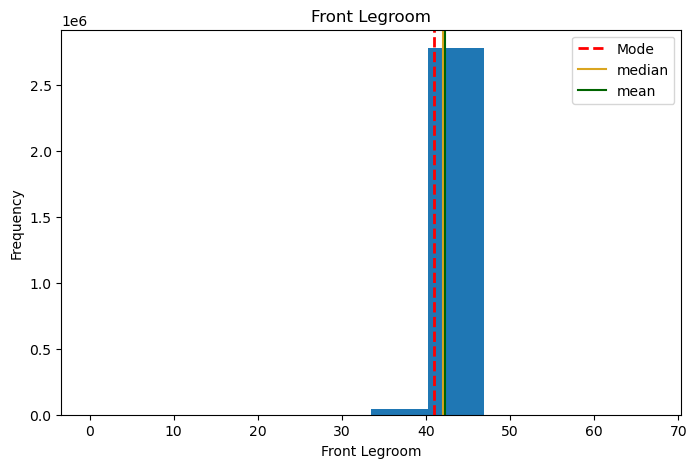

In [14]:
import matplotlib.pyplot as plt

# plotting the distribution of the column
plt.figure(figsize=(8,5))
plt.hist(df['front_legroom'], bins=10)
plt.title("Front Legroom")
# Add the mode
plt.axvline(df['front_legroom'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(df['front_legroom'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(df['front_legroom'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Front Legroom')
plt.ylabel('Frequency')
plt.show()

The graph shows that front_legroom is usually between 40-45, so we can fill in the missing values with the mean.

In [15]:
# filling the null values with the mean of the column
df['front_legroom'].fillna(df['front_legroom'].mean(), inplace=True)

# checking the result
result = df['front_legroom'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the front_legroom column are {result.round(2)}%.")

The amount of null values in the front_legroom column are 0.0%.


### body_type

The amount of null values in the body_type column are 0.45%

In [16]:
#checking the rows of the null values in the body_type column
df_bd = df[['body_type', 'make_name', 'model_name']][df['body_type'].isna()]
df_bd.sample(10)

,body_type,make_name,model_name
533112,NaN,Kia,K5
369374,NaN,Kia,K5
1990577,NaN,Subaru,Ascent
2377756,NaN,Hyundai,Palisade
545910,NaN,Mazda,CX-30
2301334,NaN,Kia,K5
118317,NaN,Kia,K5
2707164,NaN,Mazda,CX-30
2812293,NaN,Alfa Romeo,Stelvio
798257,NaN,Kia,K5


In [17]:
# checking the body_type column for the most common body type
df['body_type'].value_counts()/df['body_type'].shape*100

SUV / Crossover    47.212867
Sedan              24.734200
Pickup Truck       15.819567
Hatchback           2.945767
Minivan             2.660067
Coupe               2.386833
Van                 1.572200
Wagon               1.350100
Convertible         0.867000
Name: body_type, dtype: float64

Based on this sample and the most common body types, we can conclude that the nan values of 'body_type' are mostly SUV / Crossover types. In this case, the missing values are filled in with the most common car type.

In [18]:
df['body_type'].replace(np.nan, 'SUV / Crossover', inplace=True)

# checking for nulls
result = df['body_type'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the body_type column are {result.round(2)}%")

The amount of null values in the body_type column are 0.0%


### engine_cylinders

The amount of null values in the engine_cylinders column are 3.35%.

In [19]:
# checking the value counts of the column.
pd.DataFrame(df['engine_cylinders'].value_counts()/df.shape[0]*100).head()

,engine_cylinders
I4,47.275767
V6,24.568400
V8,9.331233
V8 Flex Fuel Vehicle,2.612400
I4 Hybrid,2.423700


This category seems to have information from columnns fuel_type and engine_type, so we can make a decision to drop this column.

In [20]:
df = df.drop(['engine_cylinders'], axis=1)

### engine_displacement

This measurement pertains to the engine's capacity, indicating the total volume within the engine. Several variables influence engine displacement, such as the cylinder count, cylinder size, and piston stroke. However, as this information is more effectively conveyed in the horsepower column, we can omit this particular column.

In [21]:
df = df.drop(['engine_displacement'], axis=1)
df.head()

,back_legroom,body_type,city_fuel_economy,daysonmarket,engine_type,exterior_color,fleet,frame_damaged,front_legroom,fuel_tank_volume,...,theft_title,torque,transmission,transmission_display,wheel_system,wheelbase,width,year,has_picture,has_description
0,35.099998,SUV / Crossover,NaN,522,I4,Solar Yellow,NaN,NaN,41.200001,12.7 gal,...,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,FWD,101.2 in,79.6 in,2019,True,True
1,38.099998,SUV / Crossover,NaN,207,I4,Narvik Black,NaN,NaN,39.099998,17.7 gal,...,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,AWD,107.9 in,85.6 in,2020,True,True
2,35.400002,Sedan,17.0,1233,H4,None,False,False,43.299999,15.9 gal,...,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,AWD,104.3 in,78.9 in,2016,False,False
3,37.599998,SUV / Crossover,NaN,196,V6,Eiger Gray,NaN,NaN,39.000000,23.5 gal,...,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,AWD,115 in,87.4 in,2020,True,True
4,38.099998,SUV / Crossover,NaN,137,I4,Narvik Black,NaN,NaN,39.099998,17.7 gal,...,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,AWD,107.9 in,85.6 in,2020,True,True


### fuel_type & fuel_tank_volume

The amount of null values in the fuel_type column are 2.76%.

The amount of null values in the fuel_tank_volume column are 5.31 %.

In [22]:
# checking the value counts of the column.
df['fuel_type'].value_counts()/df.shape[0]*100

Gasoline                  86.613367
Flex Fuel Vehicle          5.199700
Hybrid                     2.533700
Diesel                     1.481733
Biodiesel                  0.861800
Electric                   0.547167
Compressed Natural Gas     0.004867
Propane                    0.000200
Name: fuel_type, dtype: float64

In [23]:
# Let's look little closer the rows
df[df['fuel_type'].isna()][['fuel_type','fuel_tank_volume','engine_type','make_name','model_name']]

,fuel_type,fuel_tank_volume,engine_type,make_name,model_name
42,NaN,12.7 gal,NaN,Jeep,Renegade
50,NaN,NaN,NaN,Subaru,Impreza
61,NaN,16.9 gal,NaN,Chrysler,200
112,NaN,24.6 gal,NaN,Jeep,Grand Cherokee
217,NaN,26 gal,NaN,RAM,1500
...,...,...,...,...,...
2999491,NaN,48 gal,NaN,Ford,F-350 Super Duty
2999523,NaN,34 gal,NaN,Ford,F-250 Super Duty
2999603,NaN,48 gal,NaN,Ford,F-250 Super Duty
2999787,NaN,13.2 gal,NaN,Nissan,Sentra


After a little googling, it seems that most of the 'fuel_type' is Gasoline, so the missing values are fixed with that.

In [24]:
# filling the null values with "Gasoline".
df['fuel_type'].fillna("Gasoline", inplace=True)

# checking the result
percentage = df['fuel_type'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the fuel_type column are {percentage.round(2)}%.")

The amount of null values in the fuel_type column are 0.0%.


In [25]:
# checking the null values rows in the fuel_tank_volume column
df[df['fuel_tank_volume'].isna()][['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
50,NaN,Gasoline
162,NaN,Gasoline
263,NaN,Gasoline
274,NaN,Electric
303,NaN,Gasoline
...,...,...
2999949,NaN,Electric
2999974,NaN,Gasoline
2999975,NaN,Gasoline
2999992,NaN,Gasoline


In [26]:
# Investigating fuel_tank_volume category
df['fuel_tank_volume'].unique()

array(['12.7 gal', '17.7 gal', '15.9 gal', '23.5 gal', '16.6 gal',
       '13.2 gal', '10.5 gal', '15.8 gal', '22.5 gal', '14.8 gal',
       '14 gal', '17.4 gal', '19.4 gal', '22 gal', '24.6 gal', '13.5 gal',
       nan, '16.9 gal', '18.8 gal', '27.6 gal', '21.5 gal', '15.6 gal',
       '18.5 gal', '26 gal', '12.4 gal', '19.2 gal', '18.6 gal',
       '14.9 gal', '23.2 gal', '24 gal', '16.4 gal', '13.7 gal', '19 gal',
       '14.5 gal', '31 gal', '24.1 gal', '18.1 gal', '18 gal', '21.7 gal',
       '23.8 gal', '15.3 gal', '34 gal', '21 gal', '19.5 gal', '16 gal',
       '28 gal', '26.4 gal', '27.7 gal', '36 gal', '35 gal', '20 gal',
       '21.6 gal', '15.1 gal', '21.1 gal', '12.8 gal', '11 gal',
       '22.2 gal', '16.1 gal', '17.2 gal', '19.8 gal', '20.5 gal',
       '17 gal', '9.3 gal', '25.1 gal', '25.4 gal', '25 gal', '13 gal',
       '11.1 gal', '21.9 gal', '23 gal', '11.9 gal', '14.2 gal',
       '14.3 gal', '16.5 gal', '11.4 gal', '17.8 gal', '17.1 gal', '--',
       '9.2 gal', 

In [27]:
df['fuel_tank_volume'] = df['fuel_tank_volume'].str.split(' ').str[0]
df['fuel_tank_volume'] = pd.to_numeric(df['fuel_tank_volume'], downcast='float', errors='coerce')

In [28]:
# filling the null values with the mean based on the fuel_tank_volume column.
df['fuel_tank_volume'].fillna(df.groupby('fuel_type')['fuel_tank_volume'].transform('mean'), inplace=True)

# checking the result
percentage = df['fuel_tank_volume'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the fuel_tank_volume column are {percentage.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 0.0%.


### engine_type

The amount of null values in the engine_type column are 3.35%.

In [29]:
# checking the value counts of the column.
df['engine_type'].value_counts()/df.shape[0]*100

I4                           47.275767
V6                           24.568400
V8                            9.331233
V8 Flex Fuel Vehicle          2.612400
I4 Hybrid                     2.423700
V6 Flex Fuel Vehicle          2.277867
H4                            2.195333
I3                            1.810033
I6                            0.944067
I6 Diesel                     0.781267
V8 Biodiesel                  0.738233
I4 Flex Fuel Vehicle          0.306200
I4 Diesel                     0.240333
V6 Diesel                     0.221900
V8 Diesel                     0.208867
I5                            0.176700
H6                            0.156200
V6 Biodiesel                  0.120367
V6 Hybrid                     0.101933
V12                           0.043867
V10                           0.043033
I2                            0.029900
W12                           0.016133
V8 Hybrid                     0.004233
W12 Flex Fuel Vehicle         0.003233
I5 Biodiesel             

We will remove fuel_type from the values of this column, because fuel_type is also described in another category.

In [30]:
df['engine_type'] = df['engine_type'].str.split(' ').str[0]
df['engine_type'].unique()

array(['I4', 'H4', 'V6', 'I6', nan, 'V8', 'I3', 'I5', 'R2', 'W12', 'V10',
       'V12', 'H6', 'I2', 'W8', 'W16'], dtype=object)

In [31]:
# looking at the null rows
df.loc[df['engine_type'].isna(),['make_name','model_name','engine_type', 'fuel_type']]

,make_name,model_name,engine_type,fuel_type
42,Jeep,Renegade,NaN,Gasoline
50,Subaru,Impreza,NaN,Gasoline
61,Chrysler,200,NaN,Gasoline
112,Jeep,Grand Cherokee,NaN,Gasoline
217,RAM,1500,NaN,Gasoline
...,...,...,...,...
2999874,Chevrolet,Bolt EV,NaN,Electric
2999882,Chevrolet,Bolt EV,NaN,Electric
2999919,Nissan,LEAF,NaN,Electric
2999949,Nissan,LEAF,NaN,Electric


There seems to be a lot of empty values here when the car's fuel_type is electric.

In [32]:
df.loc[(df['engine_type'].isna()) & (df['fuel_type'] == "Electric"),['make_name','model_name','engine_type', 'fuel_type']]

,make_name,model_name,engine_type,fuel_type
274,Kia,Soul EV,NaN,Electric
1182,Kia,Niro EV,NaN,Electric
1721,Chevrolet,Bolt EV,NaN,Electric
1729,Chevrolet,Bolt EV,NaN,Electric
2351,Hyundai,Ioniq Electric,NaN,Electric
...,...,...,...,...
2999820,Chevrolet,Bolt EV,NaN,Electric
2999874,Chevrolet,Bolt EV,NaN,Electric
2999882,Chevrolet,Bolt EV,NaN,Electric
2999919,Nissan,LEAF,NaN,Electric


In [33]:
# filling the null values with the fuel_type "Electric" with the "Electric Motor" value.
df.loc[(df['engine_type'].isna()) & (df['fuel_type'] == "Electric"), 'engine_type'] = "Electric Motor"

# filling the null values with the fuel_type "Gasoline" with the "Gasoline engine" value.
df.loc[(df['engine_type'].isna()) & (df['fuel_type'] == "Gasoline"), 'engine_type'] = "I4"

In [34]:
# checking for nulls
result = df['engine_type'].isna().sum()/df.shape[0]*100
 
print(f"The amount of null values in the engine_type column are {result}%.")

The amount of null values in the engine_type column are 0.027666666666666666%.


In [35]:
# checking the null values rows in the engine_type column
df[df['engine_type'].isna()][['engine_type','fuel_type']]

,engine_type,fuel_type
7186,NaN,Diesel
7264,NaN,Diesel
8259,NaN,Diesel
10489,NaN,Diesel
10503,NaN,Diesel
...,...,...
2976914,NaN,Diesel
2977375,NaN,Diesel
2977385,NaN,Diesel
2977393,NaN,Diesel


In [36]:
# filling the null values with the fuel_type "Diesel" with the "Diesel" value.
df.loc[(df['engine_type'].isna()) & (df['fuel_type'] == "Diesel"), 'engine_type'] = "Diesel engine"

result = df['engine_type'].isna().sum()/df.shape[0]*100
print(f"The amount of null values in the engine_type column are {result}%.")

The amount of null values in the engine_type column are 0.0%.


### exterior_color & interior color

The amount of null values in the exterior_color column are 0.00%.
The amount of null values in the interior_color column are 0.01%.

In [37]:
# checking the value counts of the column.
df['exterior_color'].value_counts()/df.shape[0]*100

Black                                  5.415367
White                                  4.218600
Summit White                           3.214333
Silver                                 2.630233
Gray                                   2.585400
                                         ...   
Blue Dusk Clearcoat Metallic           0.000033
Dark Performancesian Green Metallic    0.000033
BRILLANT                               0.000033
WHITE MET                              0.000033
Cosmic                                 0.000033
Name: exterior_color, Length: 28665, dtype: float64

In [38]:
# checking the value counts of the column.
df['interior_color'].value_counts()/df.shape[0]*100

Black                                                         29.046233
None                                                          12.793800
Gray                                                           6.530133
Jet Black                                                      6.206367
Black (Ebony)                                                  4.761300
                                                                ...    
Brown (Cappuccino w/Heated Lincoln Soft Touch Front Seats)     0.000033
Circuit Red Nuluxe[nuluxe] With Dark Gray Streamli             0.000033
Nut Brown/ Black Leather                                       0.000033
Black/Orange w/Fabric Seat Trim (FD)                           0.000033
Brown (Espresso/Iv/Tan/Esp/Iv/Iv)                              0.000033
Name: interior_color, Length: 45726, dtype: float64

From the output, you can see that the names of the colors vary greatly. First we change the null values to black ant then colors that are for example Blue Dusk Clearcoat Metallic to Blue etc.

In [39]:
# replacing null values with Black.
df['exterior_color'].fillna("Black", inplace=True)

# making a list of the top exterior colors
colors = ['White', 'Black', 'Gray', 'Silver',
          'Red', 'Blue', 'Brown', 'Green', 'Beige',
          'Orange', 'Gold', 'Yellow', 'Purple']

# extracting the top exterior colors from the exterior_color column
df['exterior_color'] = df['exterior_color'].str.findall('|'.join(colors)).apply(set).str.join(', ')

df['exterior_color'].value_counts()/df.shape[0]*100

                     24.610267
White                21.116700
Black                17.963933
Silver               11.440933
Blue                  7.799500
                       ...    
Red, White, Gold      0.000033
Orange, Silver        0.000033
Brown, Blue           0.000033
Yellow, Gray          0.000033
White, Blue, Gold     0.000033
Name: exterior_color, Length: 82, dtype: float64

In [40]:
# replacing null values with 'Other Color'.
df['exterior_color'].replace("", "Other Color", inplace=True)

# masking rows with more than one color
mask = df['exterior_color'].map(df['exterior_color'].value_counts()) < 4424

# labeling the rows with more than one color as 'Mixed Colors'
df['exterior_color'] =  df['exterior_color'].mask(mask, 'Mixed Colors')

# checking the new unique values in the exterior_color_new column
df['exterior_color'].value_counts()/df.shape[0]*100

Other Color     24.610267
White           21.116700
Black           17.963933
Silver          11.440933
Blue             7.799500
Red              7.444633
Gray             7.227333
Green            0.683167
Mixed Colors     0.407467
Brown            0.368400
Orange           0.351200
Gold             0.289700
Beige            0.149300
Yellow           0.147467
Name: exterior_color, dtype: float64

In [41]:
# filling the null values with the most frequent value
df['interior_color'].fillna("Black", inplace=True)

# Adding a new column based on the list of primary colors.
colors = ['White', 'Black', 'Gray', 'Silver', 
          'Red', 'Blue', 'Brown', 'Green', 
          'Beige', 'Orange', 'Gold', 'Yellow', 'Purple']

df['interior_color'] = df['interior_color'].str.findall('|'.join(colors)).apply(set).str.join(', ')

# checking the result
df['interior_color'].value_counts()

Black                 1572862
                       643421
Gray                   374038
White                   91438
Brown                   74539
                       ...   
Brown, Red                  1
Silver, Blue, Gray          1
Silver, Green               1
White, Gold                 1
Purple, Green               1
Name: interior_color, Length: 84, dtype: int64

In [42]:
# replacing null values with 'Other Color'.
df['interior_color'].replace("", "Other Color", inplace=True)

# masking rows with more than one color
mask = df['interior_color'].map(df['interior_color'].value_counts()) < 4424

# labeling the rows with more than one color as 'Mixed Colors'
df['interior_color'] =  df['interior_color'].mask(mask, 'Mixed Colors')

df['interior_color'].replace(["Brown, Beige","Gray, Black","Red, Black", "Brown, Black, Beige", "Brown, Black"],"Mixed Colors", inplace=True)
df['interior_color'].replace(["Beige, Brown","Black, Red","Beige, Brown, Black", "Black, Gray"],"Mixed Colors", inplace=True)

df['interior_color'].value_counts()/df.shape[0]*100

Black                  52.428733
Other Color            21.447367
Gray                   12.467933
Mixed Colors            5.073133
White                   3.047933
Brown                   2.484633
Red                     1.125200
Silver                  0.804500
Blue                    0.759600
Brown, Beige, Black     0.360967
Name: interior_color, dtype: float64

### fleet

The amount of null values in the fleet column are 47.55%.

By examining the dataframe, it can be noticed that the 'frame_damaged', 'has_accidents', 'isCab', 'salvage', 'theft_title' columns have exactly the same null percentage as the fleet.

In [43]:
# filtering the columns that match in null values
percentage = df.isna().sum()/df.shape[0]*100
pd.DataFrame(percentage[percentage.between(47, 48)])

,0
fleet,47.552633
frame_damaged,47.552633
has_accidents,47.552633
isCab,47.552633
salvage,47.552633
theft_title,47.552633


This indicates that the data in these columns is repetitive. We can safely remove these columns and retain the 'fleet' column, which we'll rename to 'damage_history'.

In [44]:
# dropping the columns
df = df.drop(['frame_damaged', 'has_accidents', 'isCab', 'salvage', 'theft_title'], axis=1)

# filling the null values with "False" and renaming the column to "has_incidents"
df['fleet'].fillna("False", inplace=True)

# checking the result
df['fleet'].isna().sum()/df.shape[0]*100

# renaming the column to "has_incidents"
df.rename(columns={'fleet': 'damage_history'}, inplace=True)

# checking the result
df.head()

,back_legroom,body_type,city_fuel_economy,daysonmarket,engine_type,exterior_color,damage_history,front_legroom,fuel_tank_volume,fuel_type,...,savings_amount,torque,transmission,transmission_display,wheel_system,wheelbase,width,year,has_picture,has_description
0,35.099998,SUV / Crossover,NaN,522,I4,Yellow,False,41.200001,12.700000,Gasoline,...,0,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,FWD,101.2 in,79.6 in,2019,True,True
1,38.099998,SUV / Crossover,NaN,207,I4,Black,False,39.099998,17.700001,Gasoline,...,0,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,AWD,107.9 in,85.6 in,2020,True,True
2,35.400002,Sedan,17.0,1233,H4,Other Color,False,43.299999,15.900000,Gasoline,...,0,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,AWD,104.3 in,78.9 in,2016,False,False
3,37.599998,SUV / Crossover,NaN,196,V6,Gray,False,39.000000,23.500000,Gasoline,...,0,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,AWD,115 in,87.4 in,2020,True,True
4,38.099998,SUV / Crossover,NaN,137,I4,Black,False,39.099998,17.700001,Gasoline,...,0,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,AWD,107.9 in,85.6 in,2020,True,True


### height, length & width

The amount of null values in the height column are 5.31%
The amount of null values in the length column are 5.31%.
The amount of null values in the width column are 5.31%.

In [45]:
df['height'].value_counts()/df.shape[0]*100

66.1 in    2.838767
66.3 in    2.585200
56.5 in    2.440067
56.9 in    2.418167
65.4 in    2.302800
             ...   
96.2 in    0.000033
93.3 in    0.000033
104 in     0.000033
82.5 in    0.000033
103 in     0.000033
Name: height, Length: 472, dtype: float64

In [46]:
# checking the value counts of the column.
df['length'].value_counts()/df.shape[0]*100

231.9 in    3.257167
183.1 in    2.157633
231.7 in    1.926833
182.3 in    1.829633
184.5 in    1.707167
              ...   
160.2 in    0.000033
151.6 in    0.000033
156.4 in    0.000033
148.5 in    0.000033
235.1 in    0.000033
Name: length, Length: 836, dtype: float64

In [47]:
df['width'].value_counts()/df.shape[0]*100

72.4 in    4.383000
73 in      3.568833
96.8 in    3.471367
70.9 in    2.434933
83.5 in    2.408400
             ...   
90.7 in    0.000067
62.6 in    0.000067
62 in      0.000033
55 in      0.000033
65.1 in    0.000033
Name: width, Length: 285, dtype: float64

In [48]:
df['height'] = df['height'].str.split(' ').str[0]
df['height'] = pd.to_numeric(df['height'], downcast='float', errors='coerce')

df['height'].unique()

array([ 66.5,  68. ,  58.1,  73. ,  66.3,  56.9,  64.9,  46.6,  56.5,
        60.7,  66.2,  57.6,  55.1,  70.7,  60.9,  69.9,  69.3,  65. ,
         nan,  64.1,  58.7,  58.4,  71. ,  70.8,  70.9,  73.6,  56.6,
        65.4,  58.5,  73.9,  65.3,  55.7,  67.7,  64.5,  58.3,  57.7,
        76.3,  66.1,  54.6,  74.4,  66. ,  64.8,  55.8,  69.4,  53.1,
        72.6,  56.7,  67.1,  57.1,  77.4,  57.4,  65.7,  81.3,  70.6,
        70.2,  69. ,  67. ,  77.6,  54.4,  75.5,  57. ,  72.3,  58.9,
        67.4,  75.6,  66.9,  70.1,  77.5,  74. ,  78.2,  72.1,  81.2,
        49.3,  67.9,  57.8,  79.3,  52.9,  67.3,  56.8,  56.2,  63.3,
        56.3,  83.4,  68.9,  55.3,  82.4,  72.8,  66.8,  72.4,  63.9,
        62.9,  55. ,  54.8,  58. ,  95.5,  65.2,  70.4,  69.5,  68.2,
        54. ,  64.4,  76.7,  54.2,  68.7,  71.5,  54.7,  76. ,  53.9,
        53.5,  55.9,  60. ,  71.3,  50.8,  74.3,  65.6,  57.9,  57.2,
        68.3,  63.6,  59.6,  54.9,  68.5,  67.5,  68.4,  51.8,  76.9,
        75.7,  51.2,

In [49]:
df['height'].fillna(df['height'].mean(), inplace=True)
result = df['height'].isna().sum()/df.shape[0]*100
print(f"The amount of null values in the height column are {result.round(2)}%.")

df['length'] = df['length'].str.split(' ').str[0]
df['length'] = pd.to_numeric(df['length'], downcast='float', errors='coerce')
df['length'].fillna(df['length'].mean(), inplace=True)
result = df['length'].isna().sum()/df.shape[0]*100
print(f"The amount of null values in the height column are {result.round(2)}%.")

The amount of null values in the height column are 0.0%.
The amount of null values in the height column are 0.0%.


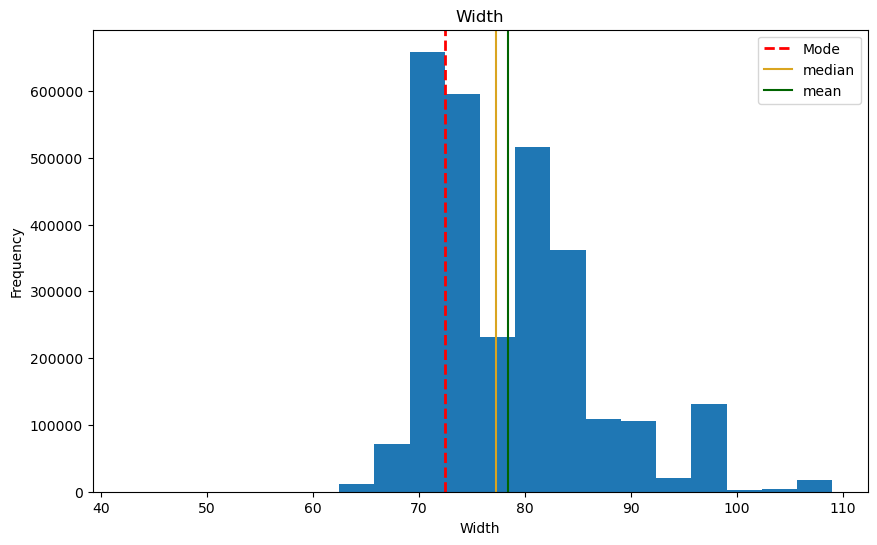

In [50]:
# splitting the column and returning the first value
df['width'] = df['width'].str.split(" ").str[0]
# replacing "--" with a null value.
df['width'].replace("--", np.nan, inplace=True)
# converting the column to float.
df['width'] = df['width'].astype(float)

# plotting the distribution of the column
plt.figure(figsize=(10,6))
plt.hist(df['width'], bins=20)
plt.title('Width')
# Add the mode
plt.axvline(df['width'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(df['width'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(df['width'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()

In [51]:
# filling the null values with the mode of the column.
df['width'].fillna(df['width'].mode()[0], inplace=True)

# checking the result
result = df['width'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the width column are {result.round(2)}%.")

The amount of null values in the width column are 0.0%.


### city_fuel_economy & highway_fuel economy

The amount of null values in the city_fuel_economy column is 16.38%, and the amount of null values in the highway_fuel_economy column is 16.38% which are generally very high. Now we have to investigate what the missing values could be, and what we do with them. AT last, when both columns have been processed, we combine them and make a new column 'combined_fuel_economy'.

In [52]:
# checking for the value counts of the column.
df['city_fuel_economy'].value_counts()

19.0     198957
18.0     191820
22.0     174752
21.0     170908
20.0     169252
          ...  
78.0          6
98.0          5
93.0          3
112.0         3
7.0           2
Name: city_fuel_economy, Length: 100, dtype: int64

Most of the values seem to fall between 10 and 30, so we can fill in the missing values with the mean value.

In [53]:
# replacing null values with the mean of the column
df['city_fuel_economy'].replace(np.nan, df['city_fuel_economy'].mean(), inplace=True)

# Null check
result = df['city_fuel_economy'].isna().sum()/df.shape[0]*100
print(f"The amount of null values in the city_fuel_economy column are {result.round(2)}%")

The amount of null values in the city_fuel_economy column are 0.0%


In [54]:
df['highway_fuel_economy'].value_counts()/df.shape[0]*100

25.0     5.452400
27.0     5.441267
28.0     5.344700
30.0     5.237367
22.0     4.948567
           ...   
10.0     0.000167
91.0     0.000100
83.0     0.000067
56.0     0.000033
120.0    0.000033
Name: highway_fuel_economy, Length: 99, dtype: float64

In [55]:
# filling the null values with the mean of the column
df['highway_fuel_economy'].fillna(df['highway_fuel_economy'].mean(), inplace=True)

# checking the result
result = df['highway_fuel_economy'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the highway_fuel_economy column are {result.round(2)}%.")

The amount of null values in the highway_fuel_economy column are 0.0%.


Now that both columns (highway_fuel_economy, city_fuel_economy) have been processed, a new column can be made where we combine the data from both columns.

In [56]:
# combining the city and highway fuel economy columns into a combined fuel economy column
df['combined_fuel_economy'] = (df['city_fuel_economy'] + df['highway_fuel_economy'])/2 

# dropping the city and highway fuel economy columns
df.drop(['city_fuel_economy','highway_fuel_economy'], axis=1, inplace=True)

# checking the head of the dataframe
df.head()

,back_legroom,body_type,daysonmarket,engine_type,exterior_color,damage_history,front_legroom,fuel_tank_volume,fuel_type,height,...,torque,transmission,transmission_display,wheel_system,wheelbase,width,year,has_picture,has_description,combined_fuel_economy
0,35.099998,SUV / Crossover,522,I4,Yellow,False,41.200001,12.700000,Gasoline,66.500000,...,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,FWD,101.2 in,79.6,2019,True,True,26.08327
1,38.099998,SUV / Crossover,207,I4,Black,False,39.099998,17.700001,Gasoline,68.000000,...,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,AWD,107.9 in,85.6,2020,True,True,26.08327
2,35.400002,Sedan,1233,H4,Other Color,False,43.299999,15.900000,Gasoline,58.099998,...,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,AWD,104.3 in,78.9,2016,False,False,20.00000
3,37.599998,SUV / Crossover,196,V6,Gray,False,39.000000,23.500000,Gasoline,73.000000,...,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,AWD,115 in,87.4,2020,True,True,26.08327
4,38.099998,SUV / Crossover,137,I4,Black,False,39.099998,17.700001,Gasoline,68.000000,...,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,AWD,107.9 in,85.6,2020,True,True,26.08327


### horsepower

The amount of null values in the horsepower column are 5.75%. 

In [57]:
# checking the value counts of the column.
df['horsepower'].value_counts()/df.shape[0]*100

170.0    4.028700
375.0    2.618733
395.0    2.555900
310.0    2.343067
180.0    2.333400
           ...   
313.0    0.000033
91.0     0.000033
77.0     0.000033
65.0     0.000033
69.0     0.000033
Name: horsepower, Length: 455, dtype: float64

In [58]:
# filling the null values with the most common value
df['horsepower'].fillna(df['horsepower'].mode()[0], inplace=True)

# checking the result
percentage = df['horsepower'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the horsepower column are {percentage.round(2)}%.")

The amount of null values in the horsepower column are 0.0%.


### major_options

The amount of null values in the major_options column are 6.67%.

In [59]:
# checking the value counts
df['major_options'].value_counts()/df.shape[0]*100

['Alloy Wheels', 'Bluetooth', 'Backup Camera']                                                                                                                                                                                                                      2.969267
['Alloy Wheels']                                                                                                                                                                                                                                                    1.376367
['Steel Wheels']                                                                                                                                                                                                                                                    1.366500
['Bluetooth', 'Backup Camera']                                                                                                                                                                   

In [60]:
# creating a major_options_count column to count the number of major options
df['major_options_count'] = df['major_options'].str.count(',') + 1
 
# checking the result
df['major_options_count'].value_counts()

4.0     340504
3.0     314017
5.0     307010
6.0     282661
7.0     249399
8.0     225955
2.0     224622
1.0     183388
9.0     183370
10.0    150292
11.0    115621
12.0     80844
13.0     51701
14.0     32477
15.0     18990
16.0     12780
17.0      8002
18.0      5175
19.0      3521
20.0      2501
21.0      1640
22.0      1273
23.0      1063
24.0       746
25.0       623
26.0       492
27.0       311
28.0       222
29.0       211
30.0       125
31.0        93
32.0        89
33.0        56
34.0        48
35.0        41
36.0        24
38.0        14
37.0        12
39.0         7
40.0         6
45.0         4
41.0         4
44.0         3
48.0         3
53.0         2
49.0         2
52.0         2
50.0         2
43.0         2
42.0         1
59.0         1
57.0         1
47.0         1
Name: major_options_count, dtype: int64

In [61]:
# filling the null values with the mean of the column
df['major_options_count'].fillna(df['major_options_count'].mean(), inplace=True)
 
# checking the result
result = df['major_options_count'].isna().sum()/df.shape[0]*100
 
print(f"The amount of null values in the major_options_count column are {result.round(2)}%.")

The amount of null values in the major_options_count column are 0.0%.


In [62]:
# dropping the major_options column
df.drop('major_options', axis=1, inplace=True)

### maximum_seating

The amount of null values in the maximum_seating column are 5.31%.

In [63]:
# checking the value_counts of the column
df['maximum_seating'].value_counts()/df.shape[0]*100

5 seats     62.511067
7 seats     10.177500
6 seats     10.049367
8 seats      6.678600
4 seats      2.705767
2 seats      1.170167
3 seats      0.989200
15 seats     0.196867
9 seats      0.121133
12 seats     0.056767
10 seats     0.018000
--           0.016700
Name: maximum_seating, dtype: float64

In [64]:
# replacing the "--" with np.nan
df['maximum_seating'].replace("--", np.nan , inplace=True)

# filling the null values with a new value called the most frequent value.
df['maximum_seating'].fillna("5 seats", inplace=True)

df['maximum_seating'] = df['maximum_seating'].str.split(' ').str[0]

# checking the result
result = df['maximum_seating'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the maximum_seating column are {result.round(2)}%.")

The amount of null values in the maximum_seating column are 0.0%.


### mileage

The amount of null values in the mileage column are 4.81%.

In [65]:
# checking the value counts
df['mileage'].value_counts()/df.shape[0]*100

0.0         8.563233
5.0         5.029333
10.0        4.649367
3.0         2.609767
2.0         2.544733
              ...   
137822.0    0.000033
142416.0    0.000033
271567.0    0.000033
163323.0    0.000033
121932.0    0.000033
Name: mileage, Length: 197577, dtype: float64

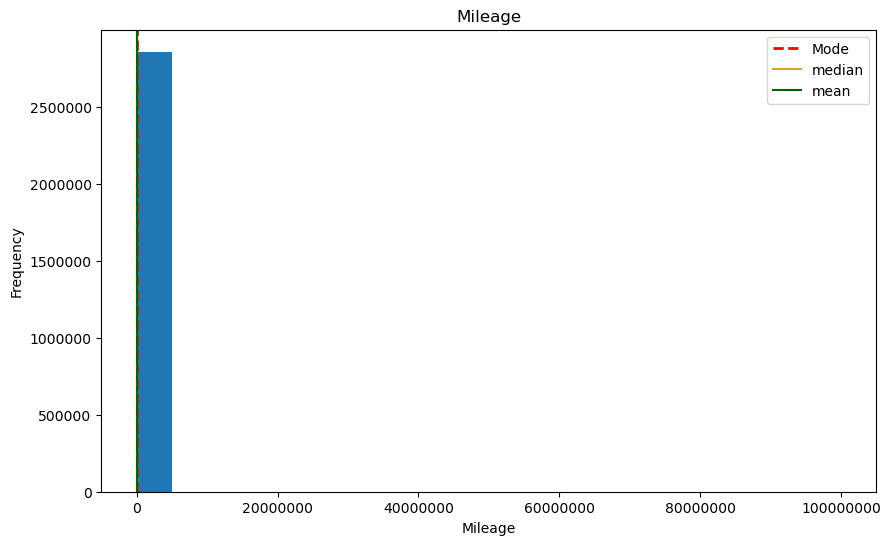

In [66]:
# plotting the mileage column to see the distribution
plt.figure(figsize=(10,6))
plt.hist(df['mileage'], bins=20)
plt.title('Mileage')
# Add the mode
plt.axvline(df['mileage'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(df['mileage'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(df['mileage'].mean(), color='darkgreen', label='mean')
#removing scientific notation
plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

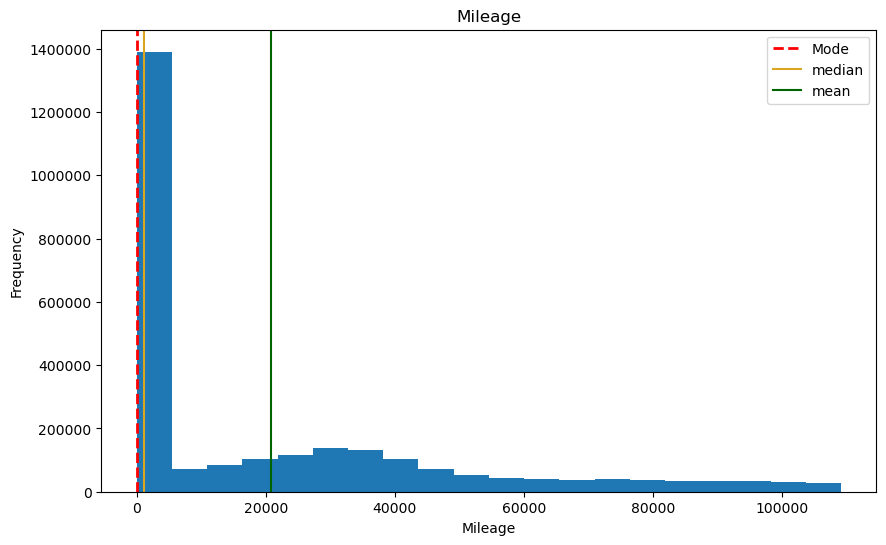

In [67]:
# using the interquartile range to remove outliers
q1 = df['mileage'].quantile(0.25)
q3 = df['mileage'].quantile(0.75)

# calculating the interquartile range
iqr = q3 - q1

# removing outliers
df = df[(df['mileage'] >= q1 - 1.5*iqr) & (df['mileage'] <= q3 + 1.5*iqr)]

# checking the result
plt.figure(figsize=(10,6))
plt.hist(df['mileage'], bins=20)
plt.title('Mileage')
# Add the mode
plt.axvline(df['mileage'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(df['mileage'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(df['mileage'].mean(), color='darkgreen', label='mean')
#removing scientific notation
plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

In [68]:
# filling the null values with the mean of the column
df['mileage'].fillna(df['mileage'].mean(), inplace=True)

# checking the result
result = df['mileage'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the mileage column are {result.round(2)}%.")

The amount of null values in the mileage column are 0.0%.


### owner_count

The amount of null values in the owner_count column are 50.57%.

In [69]:
# checking the value counts
df['owner_count'].value_counts()/df.shape[0]*100

1.0     34.609183
2.0      9.433492
3.0      2.484472
4.0      0.628963
5.0      0.174835
6.0      0.058342
7.0      0.020031
8.0      0.007997
9.0      0.003199
10.0     0.001104
11.0     0.000685
14.0     0.000114
12.0     0.000076
13.0     0.000076
15.0     0.000038
Name: owner_count, dtype: float64

In general, it is better to drop those columns with more than 50% empty values, so let's drop this column. Maybe the number of previous owners doesn't matter that much anyway, if the car's other features are suitable for the buyer.

In [70]:
df = df.drop(['owner_count'], axis=1)

### power

The amount of null values in the power column are 16.05%.

Power refers to the output generated by the engine, which quantifies the engine's performance in terms of both power output and revolutions per minute (rpm). Since this RPM-based measurement duplicates the information about the engine's power output, we will eliminate this column from the dataset to avoid redundancy.

In [71]:
df = df.drop(['power'], axis=1)

### torque

The amount of null values in the torque column are 17.26%.

In [72]:
df['torque'].value_counts()/df.shape[0]*100

383 lb-ft @ 4,100 RPM    3.095194
400 lb-ft @ 4,500 RPM    2.361467
410 lb-ft @ 3,950 RPM    2.010579
148 lb-ft @ 200 RPM      1.920477
132 lb-ft @ 4,500 RPM    1.858365
                           ...   
210 lb-ft @ 3,900 RPM    0.000038
195 lb-ft @ 2,000 RPM    0.000038
378 lb-ft @ 3,050 RPM    0.000038
142 lb-ft @ 4,500 RPM    0.000038
156 lb-ft @ 4,500 RPM    0.000038
Name: torque, Length: 1925, dtype: float64

We also have a horsepower category, so we can drop the RPM values and use only the torque values.

264.2731550652023


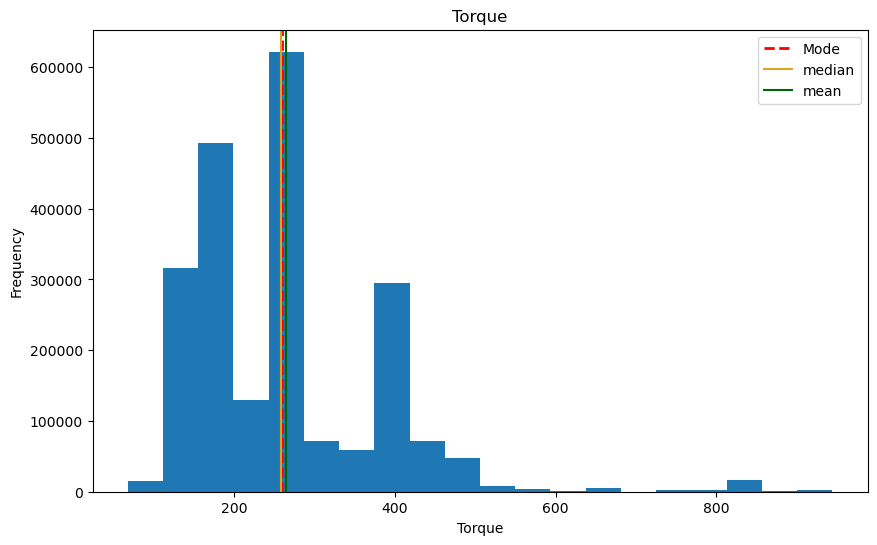

In [73]:
# splitting the column and returning the first value
df['torque'] = df['torque'].str.split(" ").str[0]

# converting the column to float.
df['torque'] = df['torque'].astype(float)

print(df['torque'].mean())

# plotting the distribution of the column
plt.figure(figsize=(10,6))
plt.hist(df['torque'], bins=20)
plt.title('Torque')
# Add the mode
plt.axvline(df['torque'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(df['torque'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(df['torque'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Torque')
plt.ylabel('Frequency')
plt.show()

In [74]:
# filling the null values with the mean of the column.
df['torque'].fillna(df['torque'].mean(), inplace=True)

# checking the result
result = df['torque'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the torque column are {result.round(2)}%.")

The amount of null values in the torque column are 0.0%.


### transmission & transmission_display

The amount of null values in the transmission column are 2.14%.
The amount of null values in the transmission_display column are 2.14%.

The transmission display conveys information about the vehicle's transmission type. However, this information essentially duplicates what is already present in the transmission column. As a result, we will remove this redundant column from the dataset.

In [75]:
df['transmission'].value_counts()/df.shape[0]*100

A              80.065844
CVT            15.986572
M               1.477012
Dual Clutch     0.378650
Name: transmission, dtype: float64

In [76]:
# filling the null values with "A", for Automatic transmission.
df['transmission'].fillna("A", inplace=True)

# checking the result
result = df['transmission'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the transmission column are {result.round(2)}%.")

The amount of null values in the transmission column are 0.0%.


In [77]:
df = df.drop(['transmission_display'], axis=1)

### wheel_system

The amount of null values in the wheel_system column are 4.89%.

In [78]:
df['wheel_system'].value_counts()/df.shape[0]*100

FWD    42.348062
AWD    23.759459
4WD    19.034049
RWD     6.197889
4X2     3.926182
Name: wheel_system, dtype: float64

In [79]:
# replacing the null values with "FWD".
df['wheel_system'].fillna("FWD", inplace=True)

# checking the result
result = df['wheel_system'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the wheel_system column are {result.round(2)}%.")

The amount of null values in the wheel_system column are 0.0%.


### wheelbase

The amount of null values in the wheel_system column are 5.31%.

In [80]:
df['wheelbase'].value_counts()/df.shape[0]*100

106.3 in    6.740406
112.2 in    4.488311
145 in      3.194740
105.1 in    3.013546
111.2 in    2.907754
              ...   
156.4 in    0.000038
130.9 in    0.000038
170 in      0.000038
96.4 in     0.000038
138.4 in    0.000038
Name: wheelbase, Length: 470, dtype: float64

In [81]:
# splitting the column and returning the first value
df['wheelbase'] = df['wheelbase'].str.split(" ").str[0]

# replacing "--" with a null value.
df['wheelbase'].replace("--", np.nan, inplace=True)

# converting the column to float.
df['wheelbase'] = df['wheelbase'].astype(float)

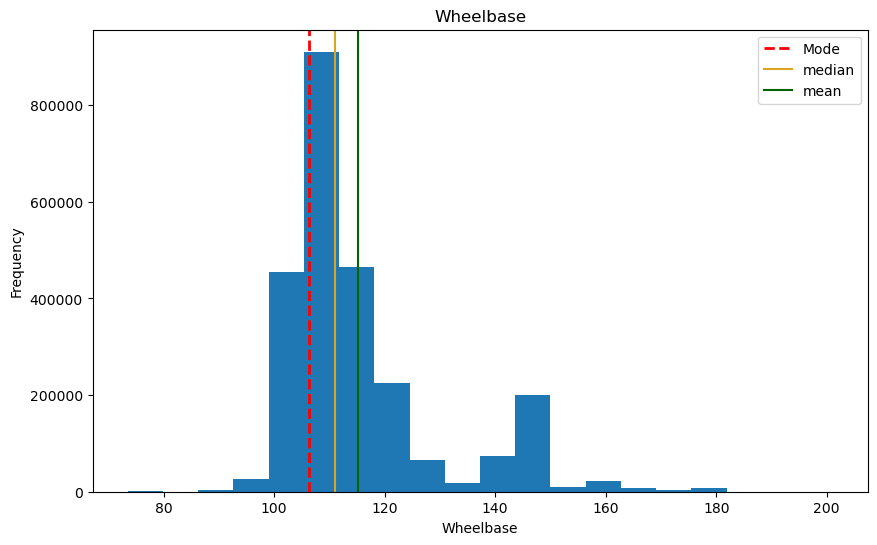

In [82]:
# plotting the distribution of the column
plt.figure(figsize=(10,6))
plt.hist(df['wheelbase'], bins=20)
plt.title('Wheelbase')
# Add the mode
plt.axvline(df['wheelbase'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(df['wheelbase'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(df['wheelbase'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Wheelbase')
plt.ylabel('Frequency')
plt.show()

In [83]:
# filling the null values with the median of the column.
df['wheelbase'].fillna(df['wheelbase'].median(), inplace=True)

# checking the result
result = df['wheelbase'].isna().sum()/df.shape[0]*100

print(f"The amount of null values in the wheelbase column are {result.round(2)}%.")

The amount of null values in the wheelbase column are 0.0%.


## Cleaned dataframe to csv

In [84]:
df.to_csv('cleaned_data.csv', index=False)

In [85]:
df.isnull().sum()

back_legroom             0
body_type                0
daysonmarket             0
engine_type              0
exterior_color           0
damage_history           0
front_legroom            0
fuel_tank_volume         0
fuel_type                0
height                   0
horsepower               0
interior_color           0
is_new                   0
length                   0
make_name                0
maximum_seating          0
mileage                  0
model_name               0
price                    0
savings_amount           0
torque                   0
transmission             0
wheel_system             0
wheelbase                0
width                    0
year                     0
has_picture              0
has_description          0
combined_fuel_economy    0
major_options_count      0
dtype: int64

In [86]:
df.head()

,back_legroom,body_type,daysonmarket,engine_type,exterior_color,damage_history,front_legroom,fuel_tank_volume,fuel_type,height,...,torque,transmission,wheel_system,wheelbase,width,year,has_picture,has_description,combined_fuel_economy,major_options_count
0,35.099998,SUV / Crossover,522,I4,Yellow,False,41.200001,12.700000,Gasoline,66.500000,...,200.0,A,FWD,101.2,79.6,2019,True,True,26.08327,1.000000
1,38.099998,SUV / Crossover,207,I4,Black,False,39.099998,17.700001,Gasoline,68.000000,...,269.0,A,AWD,107.9,85.6,2020,True,True,26.08327,1.000000
3,37.599998,SUV / Crossover,196,V6,Gray,False,39.000000,23.500000,Gasoline,73.000000,...,332.0,A,AWD,115.0,87.4,2020,True,True,26.08327,6.161011
4,38.099998,SUV / Crossover,137,I4,Black,False,39.099998,17.700001,Gasoline,68.000000,...,269.0,A,AWD,107.9,85.6,2020,True,True,26.08327,1.000000
5,37.099998,SUV / Crossover,242,I4,Other Color,False,40.200001,16.600000,Gasoline,66.300003,...,269.0,A,AWD,113.1,84.4,2020,True,True,26.08327,8.000000


In [88]:
df.shape

(2625910, 30)